In [88]:
import Pkg; Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/PycharmProjects/FreeBird.jl/Project.toml`
  No Changes to `~/PycharmProjects/FreeBird.jl/Manifest.toml`


In [89]:
using FreeBird
using Plots

In [51]:
kb = 8.617_333_262e-5  # eV K-1  # TODO: use Constants.jl

8.617333262e-5

In [32]:
# re_params = ReplicaExchangeParameters(
#     temperatures,
#     equilibrium_steps=10_000,
#     sampling_steps=10_000,
#     swap_interval=100,
#     random_seed=742022
# )

In [74]:
# Define the lattice
initial_lattice = SLattice{SquareLattice}(components=[[1,2,3,4]])

# Define the Hamiltonian
nn_energy = -0.01
adsorption_energy = 4 * nn_energy
nnn_energy = nn_energy / 4
h = GenericLatticeHamiltonian(adsorption_energy, [nn_energy, nnn_energy], u"eV")

# Define the replica exchange parameters
temperatures = collect(10:10:200)  # K
re_params = ReplicaExchangeParameters(
    temperatures,
    equilibrium_steps=2_000,
    sampling_steps=2_000,
    swap_interval=200,
    random_seed=742022
)

ReplicaExchangeParameters([10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 110.0, 120.0, 130.0, 140.0, 150.0, 160.0, 170.0, 180.0, 190.0, 200.0], 2000, 2000, 200, 742022)

In [75]:
# this took 11m 30.4s last time
energy_trajs, config_trajs, assignment_trajs, swap_acc_rate = replica_exchange(
    initial_lattice, h, re_params
)

Replica exchange sampling with 20 replicas, 2000 steps, and swap interval of 200.
Initial energies: [-0.175, -0.1825, -0.1825, -0.175, -0.185, -0.185, -0.175, -0.1825, -0.1825, -0.18, -0.165, -0.165, -0.175, -0.175, -0.1925, -0.165, -0.185, -0.17, -0.185, -0.185]
Output containers: (20,) (20,) (20,)
Equilibrated energies: [-0.20500000000000002, -0.20500000000000002, -0.195, -0.20500000000000002, -0.2, -0.20500000000000002, -0.195, -0.195, -0.195, -0.185, -0.175, -0.175, -0.175, -0.185, -0.17250000000000001, -0.1925, -0.18, -0.195, -0.185, -0.175]


([[-0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002  …  -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002], [-0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002  …  -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002, -0.20500000000000002], [-0.195, -0.195, -0.195, -0.195, -0.195, -0.195, -0.195, -0.195, -0.195, -0.195  …  -0.20500000000000002, -0

In [76]:
# Calculate the mean energy and error (naive)
meanE, errE = Float64[], Float64[]
for i in 1:length(temperatures)
    E = energy_trajs[i]
    mean_E = sum(E) / length(E)
    mean_E² = sum(E .^ 2) / length(E)
    var_E = mean_E² - mean_E^2
    std_E = sqrt(abs(var_E))  # TODO: check if this is correct
    err_E = std_E / sqrt(length(E))  # standard error
    push!(meanE, mean_E)
    push!(errE, err_E)
end

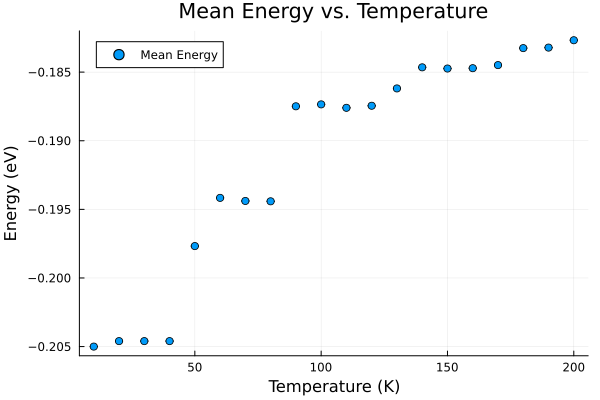

In [77]:
# Plot mean energy vs. temperature as circular points with error bars, placing the legend at the top left
scatter(
    temperatures,
    meanE,
    yerr=errE,
    label="Mean Energy",
    xlabel="Temperature (K)",
    ylabel="Energy (eV)",
    title="Mean Energy vs. Temperature",
    legend=:topleft,
    grid=true
)

In [78]:
# Calculate the constant-volume heat capacity
heat_capacity = Float64[]
for i in 1:length(temperatures)
    E = energy_trajs[i]
    mean_E = sum(E) / length(E)
    mean_E² = sum(E .^ 2) / length(E)
    var_E = mean_E² - mean_E^2
    std_E = sqrt(abs(var_E))  # TODO: check if this is correct
    heat_capacity_value = (std_E^2) / (kb * temperatures[i]^2)
    push!(heat_capacity, heat_capacity_value / kb)
end

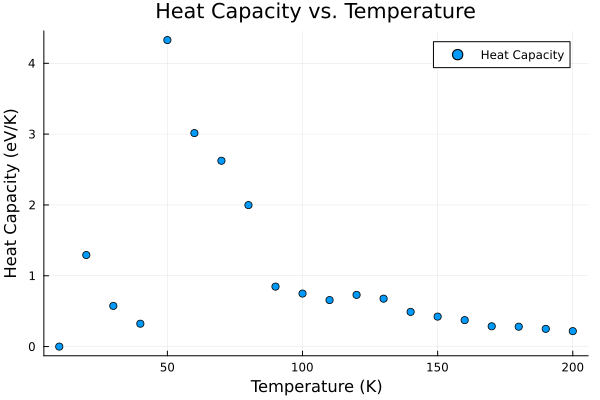

In [79]:
# Plot heat capacity vs. temperature as circular points with error bars, placing the legend at the top left
scatter(
    temperatures,
    heat_capacity,
    label="Heat Capacity",
    xlabel="Temperature (K)",
    ylabel="Heat Capacity (eV/K)",
    title="Heat Capacity vs. Temperature",
    legend=:topright,
    grid=true
)

In [106]:
abs(50*kb/nn_energy)

0.43086666309999994